# **日本手寫字體辨識模型**

## **資料導入及預先處理**

In [1]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
train_data=pd.read_csv("/kaggle/input/japanese-characters/train_data.csv")
test_data=pd.read_csv("/kaggle/input/japanese-characters/test_data.csv")

In [2]:
print(train_data.shape)
print(test_data.shape)

(60000, 786)
(10000, 786)


In [3]:
train_data = train_data.drop('Unnamed: 0', axis=1)
test_data = test_data.drop('Unnamed: 0', axis=1)

In [4]:
X_train_data=train_data.drop('label',axis=1)
Y_train_label=train_data['label']
X_test_data=test_data.drop('label',axis=1)
Y_test_label=test_data['label']

In [5]:
x_train=X_train_data.values.reshape((60000, 28, 28,1))
x_test=X_test_data.values.reshape((10000, 28, 28,1))

In [6]:
from keras.utils import to_categorical
y_train=to_categorical(Y_train_label,10)
y_test=to_categorical(Y_test_label,10)

## **確認資料型別**

In [7]:
print(X_train_data.shape)
print(Y_train_label.shape)
print(X_test_data.shape)
print(Y_test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
print(X_train_data.loc[[1]])

   0  1  2  3  4  5  6  7  8  9  ...  774  775  776  777  778  779  780  781  \
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   782  783  
1    0    0  

[1 rows x 784 columns]


In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## **模型建構**

In [10]:
from keras import models
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model=models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## **訓練模型**

In [11]:
history=model.fit(x_train,y_train,
         validation_split=0.3,
         epochs=10,
         batch_size=128)

Epoch 1/10
329/329 [==============================] - 14s 39ms/step - loss: 2.0446 - accuracy: 0.5592 - val_loss: 0.4149 - val_accuracy: 0.8712
Epoch 2/10
329/329 [==============================] - 13s 39ms/step - loss: 0.5658 - accuracy: 0.8255 - val_loss: 0.2491 - val_accuracy: 0.9263
Epoch 3/10
329/329 [==============================] - 12s 38ms/step - loss: 0.3832 - accuracy: 0.8825 - val_loss: 0.1712 - val_accuracy: 0.9493
Epoch 4/10
329/329 [==============================] - 13s 38ms/step - loss: 0.3025 - accuracy: 0.9097 - val_loss: 0.1494 - val_accuracy: 0.9575
Epoch 5/10
329/329 [==============================] - 13s 38ms/step - loss: 0.2535 - accuracy: 0.9240 - val_loss: 0.1244 - val_accuracy: 0.9648
Epoch 6/10
329/329 [==============================] - 12s 38ms/step - loss: 0.2274 - accuracy: 0.9324 - val_loss: 0.1340 - val_accuracy: 0.9646
Epoch 7/10
329/329 [==============================] - 12s 38ms/step - loss: 0.2076 - accuracy: 0.9376 - val_loss: 0.1362 - val_accuracy:

In [12]:
score=model.evaluate(x_test,y_test)
print(score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2971 - accuracy: 0.9196
0.9196000099182129


## **視覺化**

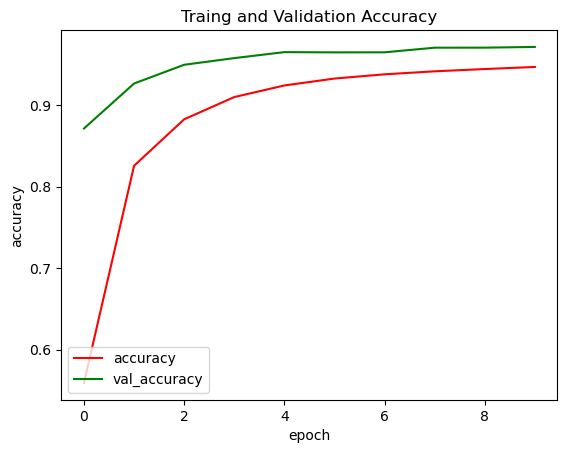

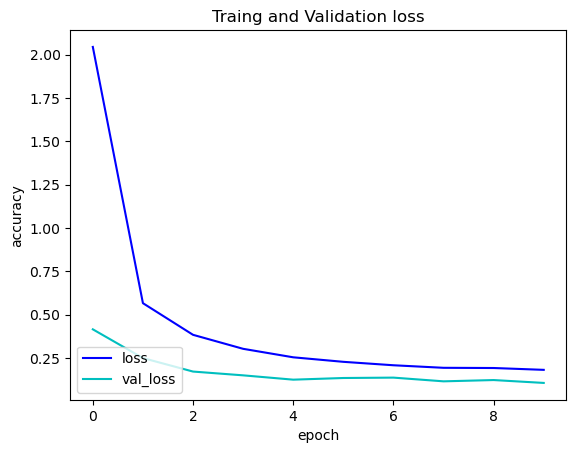

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.plot(history.history['accuracy'], 'r',label='accuracy')
plt.plot(history.history['val_accuracy'], 'g',label='val_accuracy')
plt.legend(loc = 'lower left')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Traing and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], 'b',label='loss')
plt.plot(history.history['val_loss'], 'c',label='val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Traing and Validation loss')
plt.legend(loc = 'lower left')

plt.show()

2
1/1 [==============================] - 0s 18ms/step


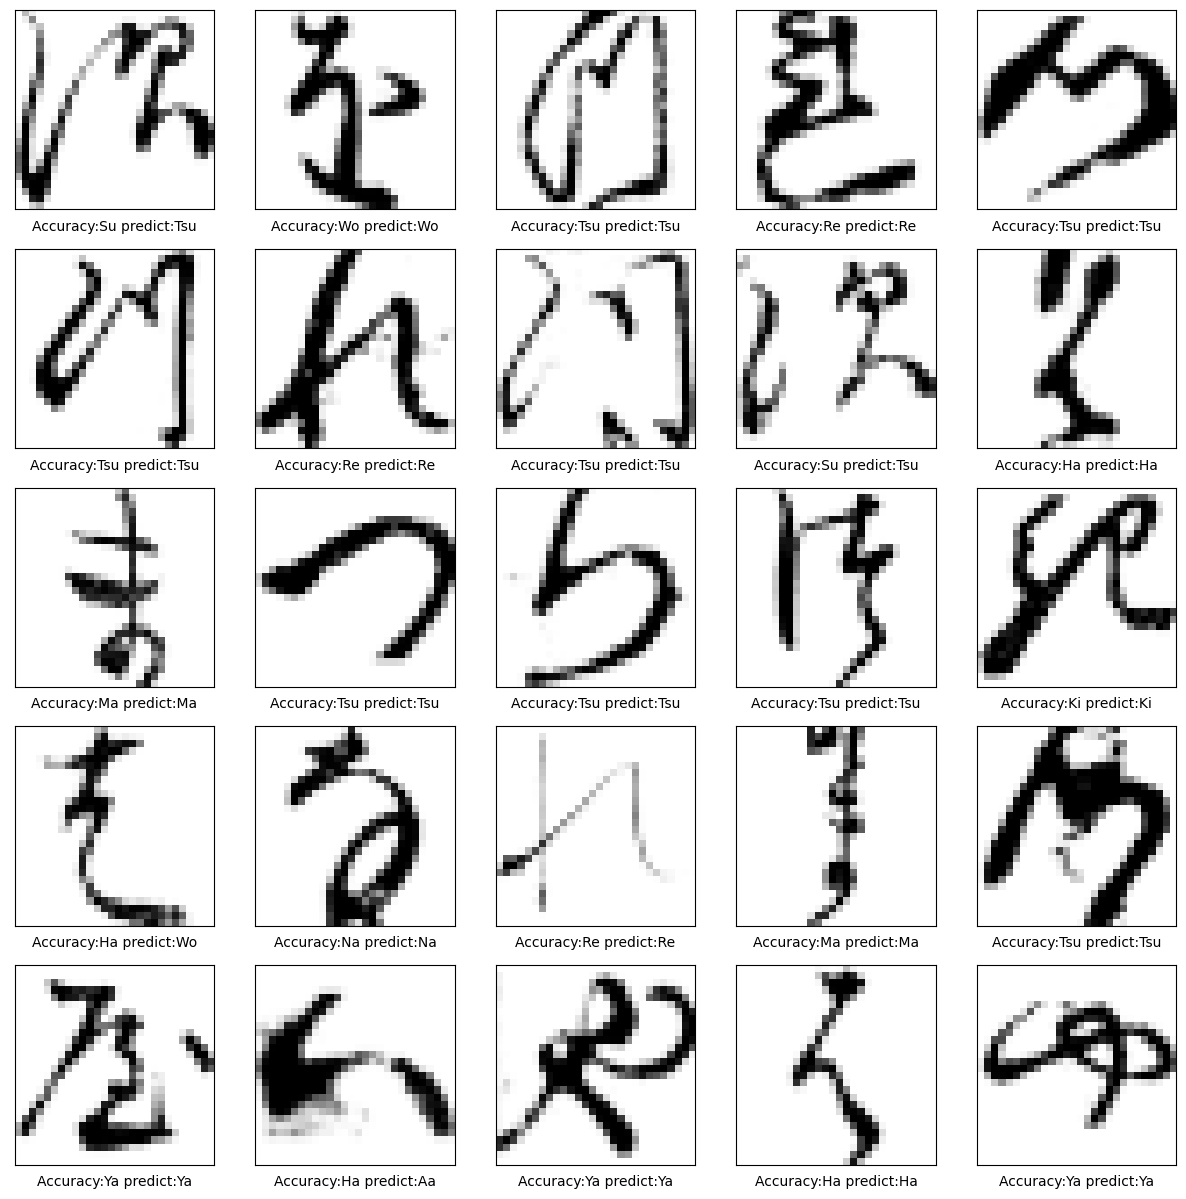

In [14]:
letter=["Aa", "Ki", "Su", "Tsu", "Na", "Ha", "Ma", "Ya", "Re", "Wo"]

print(y_test[0].argmax())
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    pred=model.predict(x_test[i].reshape(1,28,28,1))
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    plt.xlabel("Accuracy:"+letter[(y_test[i].argmax())]+" predict:"+letter[(pred.argmax())])
plt.show()